## [SVHN](https://pytorch.org/docs/stable/torchvision/datasets.html#svhn)

In [ ]:
import os
import random
import numpy as np
import torch
import torchvision

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [ ]:
dataset = torchvision.datasets.SVHN('./data', download=True)

In [ ]:
print(type(dataset))

# tuple: (image, target)

<class 'torchvision.datasets.svhn.SVHN'>


In [ ]:
print(len(dataset))

73257


In [ ]:
n = 200
data, target = dataset[n]

In [ ]:
print(type(data))

<class 'PIL.Image.Image'>


In [ ]:
print(data.mode, data.width, data.height)

RGB 32 32


In [ ]:
print(type(target))

<class 'int'>


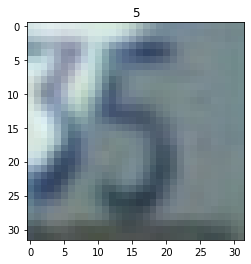

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title(target)
plt.imshow(data)
data.show()

In [ ]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
ToTensor = transforms.Compose([
    transforms.ToTensor()
])
dataset = torchvision.datasets.SVHN('./data', transform = ToTensor)

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=1,
                                          shuffle=True)

torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])


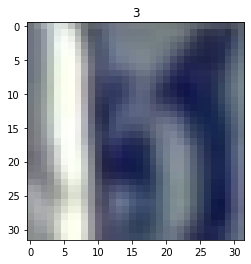

In [ ]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    print(data.shape)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(batch_size=1)
    print(data.shape)
    pic = ToPILImage(data)
    plt.title(int(target))
    plt.imshow(pic)
    plt.show()
    break

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=10,
                                          shuffle=True)

torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])


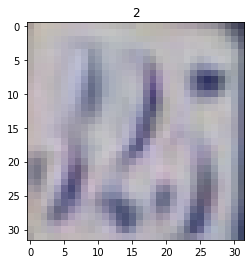

In [ ]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    index = 5
    print(data.shape)
    img = data[index]
    print(img.shape)
    pic = ToPILImage(img)
    plt.title(int(target[index]))
    plt.imshow(pic)
    plt.show()
    break

In [ ]:
# 1000개 batch
n = 1000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 2000개 batch
n = 2000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 999개 batch
n = 999
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))

print(l)
print('Total number of data: {}'.format(i))

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 257]
Total number of data: 73257
[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1257]
Total number of data: 73257
[999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 9

In [ ]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.utils as utils
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [ ]:
import torchvision.transforms as transforms
compose = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

train_data = torchvision.datasets.SVHN(root='./data/', split='train', transform=compose, download=True)
test_data  = torchvision.datasets.SVHN(root='./data/', split='test', transform=compose, download=True)

Using downloaded and verified file: ./data/train_32x32.mat


In [ ]:
print('train sets: {}'.format(len(train_data)))
print('test sets: {}'.format(len(test_data)))

train sets: 73257
test sets: 26032


In [ ]:
BATCH_SIZE = 10

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [ ]:
class SVHNModel(nn.Module):
    def __init__(self, output_size):
        super(SVHNModel, self).__init__()

        self.c1 = nn.Conv2d(3, 8, kernel_size=3)
        self.c2 = nn.Conv2d(8, 16, kernel_size=3)
        self.c3 = nn.Conv2d(16, 32, kernel_size=3)
        self.c4 = nn.Conv2d(32, 32, kernel_size=3) 
        self.c5 = nn.Conv2d(32, 64, kernel_size=3) 

        nn.init.kaiming_normal_(self.c1.weight)
        nn.init.kaiming_normal_(self.c2.weight)
        nn.init.kaiming_normal_(self.c3.weight)
        nn.init.kaiming_normal_(self.c4.weight)
        nn.init.kaiming_normal_(self.c5.weight)
        
        self.cv = nn.Sequential(
                self.c1,            # (n, 8, 30, 30)
                nn.BatchNorm2d(8),
                nn.ReLU(),
                nn.Dropout(0.2),
                nn.MaxPool2d(2),    # (n, 8, 15, 15)
                self.c2,            # (n, 16, 13, 13)
                nn.BatchNorm2d(16),
                nn.ReLU(),
                nn.Dropout(0.2),
                self.c3,            # (n, 32, 11, 11)
                nn.BatchNorm2d(32),
                nn.ReLU(),
                nn.Dropout(0.2),
                self.c4,            # (n, 32, 9, 9)
                nn.BatchNorm2d(32),
                nn.ReLU(),
                nn.Dropout(0.2),
                self.c5,            # (n, 64, 7, 7)
                nn.BatchNorm2d(64),
                nn.ReLU(),
                nn.Dropout(0.2)
        )

        self.l1 = nn.Linear(64*7*7, 512)
        self.l2 = nn.Linear(512, 256)
        self.l3 = nn.Linear(256, output_size)
        nn.init.kaiming_normal_(self.l1.weight)
        nn.init.kaiming_normal_(self.l2.weight)
        nn.init.kaiming_normal_(self.l3.weight)

        self.fc = nn.Sequential(self.l1,
                        nn.BatchNorm1d(512),
                        self.l2,
                        nn.BatchNorm1d(256),
                        self.l3,
                        nn.BatchNorm1d(output_size),
                    )        

    def forward(self, x):
        x = self.cv(x)
        x = x.view(-1, 64*7*7)
        output = self.fc(x)
        value = torch.max(output, 1)[1]
        return output, value

In [ ]:
model = SVHNModel(10).to(device)

In [ ]:
n = 0
for data, target in train_loader:
    print(data.shape) # (batch, channel, width, height)
    break

data = data.to(device)

with torch.no_grad():
    y, _ = model(data)
    print(y)
    print(np.argmax(y.cpu(), axis=1), target)

torch.Size([10, 3, 32, 32])
tensor([[-0.3633,  0.0162,  0.1569,  0.5824, -1.3300,  0.4313,  0.0964, -0.6157,
          0.8890,  1.3131],
        [-0.2635,  0.4156,  0.7785, -0.2358,  1.4281,  0.2244,  1.1316, -0.9044,
          1.0157, -0.4000],
        [ 0.1638, -1.6372, -0.3341, -0.3481, -0.0514, -1.5762,  0.3504,  1.1987,
         -0.0934, -1.9365],
        [ 1.3706, -0.5067, -0.1500,  1.6637, -1.1299,  1.3039,  1.8985, -0.9403,
          0.6153,  1.3983],
        [-0.6832,  0.3813, -1.2627, -0.2485, -0.3917,  0.1611, -1.0481, -0.1998,
          0.1276, -0.5734],
        [ 1.2711,  1.6528,  0.3517, -0.4967, -0.2139,  0.2648,  0.6963,  2.2580,
         -1.3148, -0.8359],
        [ 0.5382, -1.2284, -1.9756, -1.3180, -1.0567, -1.1064, -0.6848, -0.5203,
         -1.2522,  0.0819],
        [-1.8662, -0.3535,  0.1981, -0.0339,  1.4164, -1.4630, -0.8521,  0.0559,
          1.6371, -0.2798],
        [-1.0897,  1.5202,  0.3866,  1.7299,  1.2593,  1.4136, -0.1071, -0.8784,
         -0.3229,  

In [ ]:
BATCH_SIZE = 1000

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [ ]:
model = SVHNModel(10).to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 10 # 10회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
    model.train()
    for train_data, train_target in train_loader:
        train_data = train_data.to(device)
        train_target = train_target.to(device)
        y, _ = model(train_data)
        loss = criterion(y, train_target).sum()
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1
        del train_data
        del train_target

    model.eval()
    n_test = 0
    test_loss = 0
    correct = 0
    total = 0
    for test_data, test_target in test_loader:
        test_data = test_data.to(device)
        test_target = test_target.to(device)
        y_pred, idx_pred = model(test_data)
        del test_data
        loss = criterion(y_pred, test_target).sum()
        test_loss += loss.data.cpu().numpy()
        n_test += 1
        total += len(test_target)
        correct += (idx_pred == test_target).sum()

    accuracy = correct * 100 / total
    print('epoch {}th training loss: {} test loss: {}, accuracy: {}'.format(
            epoch, train_loss / n_train, test_loss / n_test,
            accuracy
        ))
    list_training_loss.append(train_loss / n_train)
    list_test_loss.append(test_loss / n_test)

epoch 0th training loss: 1.1161109627904118 test loss: 0.6124880534631235, accuracy: 83.73155975341797
epoch 1th training loss: 0.5294544483358795 test loss: 0.43697450558344525, accuracy: 87.95328521728516
epoch 2th training loss: 0.4203057651584213 test loss: 0.3793741597069634, accuracy: 89.49754333496094
epoch 3th training loss: 0.3688854353653418 test loss: 0.33189370455565276, accuracy: 90.32344818115234
epoch 4th training loss: 0.3410715754773166 test loss: 0.32530735929807025, accuracy: 90.69222259521484
epoch 5th training loss: 0.3208574676835859 test loss: 0.29701772221812495, accuracy: 91.46434783935547
epoch 6th training loss: 0.3059844096770158 test loss: 0.28693878015986196, accuracy: 91.43746185302734
epoch 7th training loss: 0.29247920517180415 test loss: 0.2706194707640895, accuracy: 92.08666229248047
epoch 8th training loss: 0.28259632595487544 test loss: 0.28562049015804575, accuracy: 91.72940826416016
epoch 9th training loss: 0.27230905399129196 test loss: 0.2627305

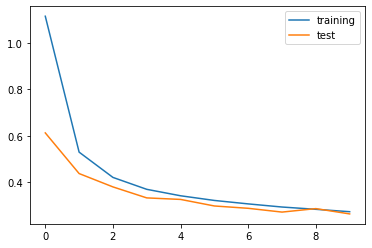

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

model.eval()
y_test = None
y_pred = None
for test_data, test_target in test_loader:
    test_data = test_data.to(device)
    test_target = test_target.to(device)
    _, y = model(test_data)
    del test_data
    if None == y_test:
        y_test = test_target
    else:
        torch.cat([y_test, test_target], dim=0)
    if None == y_pred:
        y_pred = y
    else:
        torch.cat([y_pred, y], dim=0)

score = accuracy_score(y_test.cpu(), y_pred.cpu())
print(score)

0.92
